In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 抓股票資料

In [2]:
import pandas_datareader.data as web

In [3]:
df = web.DataReader("AAPL","yahoo",start = "2019-1-1",end = "2020-1-1")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,155.405045
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.582367
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,140.085220
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,146.065353
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.740265


In [4]:
p = df["Adj Close"]
p.head()

Date
2018-12-31    155.405045
2019-01-02    155.582367
2019-01-03    140.085220
2019-01-04    146.065353
2019-01-07    145.740265
Name: Adj Close, dtype: float64

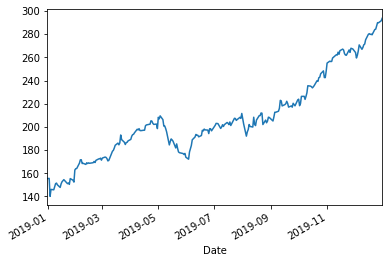

In [5]:
p.plot()

## diff / p計算報酬率
$$\frac{P_{t} - P_{t-1}}{P_{t-1}}$$

可用diff算出與上1筆資料之間的差

In [6]:
p.diff()

Date
2018-12-31          NaN
2019-01-02     0.177322
2019-01-03   -15.497147
2019-01-04     5.980133
2019-01-07    -0.325089
                ...    
2019-12-24     0.269989
2019-12-26     5.640015
2019-12-27    -0.110016
2019-12-30     1.720001
2019-12-31     2.130005
Name: Adj Close, Length: 253, dtype: float64

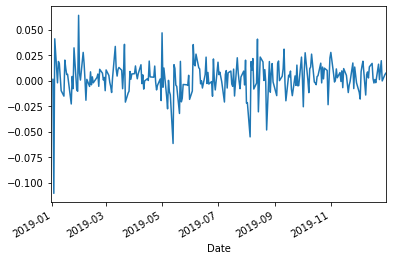

In [7]:
r = p.diff()/p
r.plot()

## rolling+mean移動平均
每次都看前n天+今天的平均，將原本不平滑的線變平滑

rolling=>開一個小視窗將範圍圈起來做運算

mean=>平均

In [8]:
p.rolling(window = 20).mean()

Date
2018-12-31           NaN
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
                 ...    
2019-12-24    272.076997
2019-12-26    273.357997
2019-12-27    274.455997
2019-12-30    275.669496
2019-12-31    277.143996
Name: Adj Close, Length: 253, dtype: float64

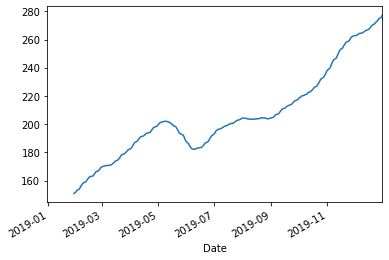

In [9]:
p.rolling(window = 20).mean().plot()

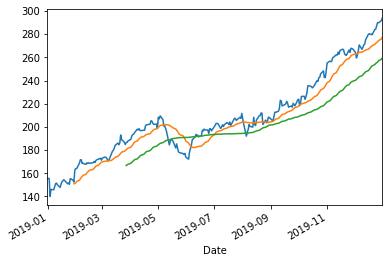

In [10]:
p.plot()
p.rolling(window = 20).mean().plot()
p.rolling(window = 60).mean().plot()